In [4]:
! pip install requests
! pip install html5lib
! pip install bs4

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.pyplot as plt
print('Libraries imported.')

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Libraries imported.


In [5]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [11]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [12]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [15]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [16]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [17]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [18]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [19]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [20]:
CLIENT_ID = 'HPPNIJVXOZNEQNVAXEZ0DMOID0RY3QWDRGISE03M2GQ3OE0D' # your Foursquare ID
CLIENT_SECRET = 'DXZVUECBAG4V1S2W5SW0OD2YAJBMN1W3D4DQIDYSKX2JTB2H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HPPNIJVXOZNEQNVAXEZ0DMOID0RY3QWDRGISE03M2GQ3OE0D
CLIENT_SECRET:DXZVUECBAG4V1S2W5SW0OD2YAJBMN1W3D4DQIDYSKX2JTB2H


In [21]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [22]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [23]:
# type your answer here
radius = 500
limit = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HPPNIJVXOZNEQNVAXEZ0DMOID0RY3QWDRGISE03M2GQ3OE0D&client_secret=DXZVUECBAG4V1S2W5SW0OD2YAJBMN1W3D4DQIDYSKX2JTB2H&ll=40.87655077879964,-73.91065965862981&v=20180605&radius=500&limit=100'

In [24]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cae83e44434b91d5dd1dab4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat        lng
0        Arturo's  Pizza Place  40.874412 -73.910271
1     Bikram Yoga  Yoga Studio  40.876844 -73.906204
2   Tibbett Diner        Diner  40.880404 -73.908937
3  Dunkin' Donuts   Donut Shop  40.877136 -73.906666
4       Starbucks  Coffee Shop  40.877531 -73.905582

In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


In [28]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [30]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3328, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude           Venue  \
0  Marble Hill              40.876551               -73.91066        Arturo's   
1  Marble Hill              40.876551               -73.91066     Bikram Yoga   
2  Marble Hill              40.876551               -73.91066   Tibbett Diner   
3  Marble Hill              40.876551               -73.91066  Dunkin' Donuts   
4  Marble Hill              40.876551               -73.91066       Starbucks   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877136       -73.906666     Donut Shop  
4       40.877531       -73.905582    Coffee Shop

In [31]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       99                      99     99   
Carnegie Hill                          100                     100    100   
Central Harlem                          44                      44     44   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             48                      48     48   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                               100                     100    100   
Greenwich Village                      100                     100    100   
Hamilton Heights                        59                      59     59   
Hudson Yards                            74                      74     74   
Inwood                                  56                      56     56   
Lenox Hill                             100                     100    100   
Lincoln Square                         100                     100    100   
Little Italy                           100                     100    100   
Lower East Side                         63                      63     63   
Manhattan Valley                        61                      61     61   
Manhattanville                          41                      41     41   
Marble Hill                             23                      23     23   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     41                      41     41   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        30                      30     30   
Soho                                   100                     100    100   
Stuyvesant Town                         21                      21     21   
Sutton Place                           100                     100    100   
Tribeca                                100                     100    100   
Tudor City                              83                      83     83   
Turtle Bay                             100                     100    100   
Upper East Side                        100                     100    100   
Upper West Side                        100                     100    100   
Washington Heights                      85                      85     85   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City                99               99              99  
Carnegie Hill                   100              100             100  
Central Harlem                   44               44              44  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      48               48              48  
East Village                    100              100             100  
Finan

In [32]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 327 uniques categories.


In [33]:

# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                    0                 0                   0           0   
1                    0                 0                   0           0   
2                    0                 0                   0           0   
3                    0                 0                   0           0   
4                    0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Workshop  BBQ Joint  \
0                      0                    0              0          0   
1                      0                    0              0          0   
2                      0                    0              0          0   
3                      0                    0              0          0   
4                      0                    0              0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0           0       0     0    0               0   
1           0           0       0     0    0               0   
2           0           0       0     0    0               0   
3           0           0       0     0    0               0   
4           0           0       0     0    0               0   

   Basketball Court  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                 0         0            0           0              0   
1                 0         0            0           0              0   
2                 0         0            0           0              0   
3                 0         0            0           0              0   
4                 0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                         0          0           0       0           0   
1                         0          0           0       0           0   
2                         0          0           0       0           0   
3                         0          0           0       0           0   
4                         0          0           0       0           0   

   Boat or Ferry  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0              0          0         0           0                     0   
1              0          0         0           0                     0   
2              0          0         0           0                     0   
3              0          0         0           0                     0   
4              0          0         0           0                     0   

   Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  Building  \
0               0            0

In [34]:
manhattan_onehot.shape

(3328, 328)

In [35]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0     Battery Park City           0.000000            0.00               0.00   
1         Carnegie Hill           0.000000            0.00               0.00   
2        Central Harlem           0.000000            0.00               0.00   
3               Chelsea           0.000000            0.00               0.00   
4             Chinatown           0.000000            0.00               0.00   
5          Civic Center           0.000000            0.00               0.00   
6               Clinton           0.000000            0.00               0.00   
7           East Harlem           0.000000            0.00               0.00   
8          East Village           0.000000            0.00               0.00   
9    Financial District           0.010000            0.00               0.00   
10             Flatiron           0.000000            0.00               0.00   
11             Gramercy           0.000000            0.00               0.00   
12    Greenwich Village           0.000000            0.00               0.00   
13     Hamilton Heights           0.000000            0.00               0.00   
14         Hudson Yards           0.000000            0.00               0.00   
15               Inwood           0.000000            0.00               0.00   
16           Lenox Hill           0.000000            0.00               0.01   
17       Lincoln Square           0.000000            0.00               0.00   
18         Little Italy           0.000000            0.00               0.00   
19      Lower East Side           0.000000            0.00               0.00   
20     Manhattan Valley           0.000000            0.00               0.00   
21       Manhattanville           0.000000            0.00               0.00   
22          Marble Hill           0.000000            0.00               0.00   
23              Midtown           0.000000            0.00               0.00   
24        Midtown South           0.000000            0.00               0.00   
25  Morningside Heights           0.000000            0.00               0.00   
26          Murray Hill           0.000000            0.00               0.00   
27                 Noho           0.000000            0.01               0.00   
28     Roosevelt Island           0.000000            0.00               0.00   
29                 Soho           0.000000            0.00               0.00   
30      Stuyvesant Town           0.000000            0.00               0.00   
31         Sutton Place           0.000000            0.01               0.00   
32              Tribeca           0.000000            0.00               0.00   
33           Tudor City           0.000000            0.00               0.00   
34           Turtle Bay           0.000000            0.00               0.00   
35      Upper East Side           0.000000            0.00               0.00   
36      Upper West Side           0.010000            0.00               0.00   
37   Washington Heights           0.011765            0.00               0.00   
38         West Village           0.010000            0.00               0.00   
39            Yorkville           0.000000            0.00               0.00   

    African Restaurant  American Restaurant  Antique Shop  Arcade  \
0             0.000000             0.010101          0.00    0.00   
1             0.000000             0.010000          0.00    0.00   
2             0.068182             0.045455          0.00    0.00   
3             0.000000             0.040000          0.00    0.00   
4             0.000000             0.040000          0.00    0.00   
5             0.000000             0.030000          0.01    0.00   
6             0.000000             0.040000          0.00    0.00   
7             0.000000             0.000000          0.00    0.00   
8             0.000000             0.020000          0.01    0.00   

In [36]:
manhattan_grouped.shape

(40, 328)

In [37]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.07
1    Coffee Shop  0.07
2          Hotel  0.05
3            Gym  0.04
4  Shopping Mall  0.03


----Carnegie Hill----
            venue  freq
0     Pizza Place  0.06
1            Café  0.05
2     Coffee Shop  0.05
3  Cosmetics Shop  0.04
4             Bar  0.04


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1  American Restaurant  0.05
2   Chinese Restaurant  0.05
3       Cosmetics Shop  0.05
4    French Restaurant  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.07
1   Italian Restaurant  0.06
2       Ice Cream Shop  0.05
3               Bakery  0.04
4  American Restaurant  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.04
2     Dim Sum Restaurant  0.04
3    American Restaurant  0.04
4  Vietnamese Restaurant  0.04


----Civic Center----
                  venue  freq
0  Gym / Fitness C

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park           Coffee Shop   
1      Carnegie Hill           Pizza Place                  Café   
2     Central Harlem    African Restaurant        Cosmetics Shop   
3            Chelsea           Coffee Shop    Italian Restaurant   
4          Chinatown    Chinese Restaurant          Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                 Hotel                   Gym              Wine Shop   
1           Coffee Shop                   Bar         Cosmetics Shop   
2   American Restaurant  Gym / Fitness Center     Seafood Restaurant   
3        Ice Cream Shop                Bakery    American Restaurant   
4    Dim Sum Restaurant   American Restaurant  Vietnamese Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Italian Restaurant         Shopping Mall      Department Store   
1   Japanese Restaurant                   Spa     French Restaurant   
2    Chinese Restaurant     French Restaurant             Bookstore   
3             Nightclub               Theater    Seafood Restaurant   
4       Bubble Tea Shop          Noodle House        Ice Cream Shop   

  9th Most Common Venue 10th Most Common Venue  
0            Food Court         Sandwich Place  
1             Bookstore            Yoga Studio  
2                Market             Bagel Shop  
3                 Hotel              Bookstore  
4    Salon / Barbershop      Hotpot Restaurant

In [40]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 0, 1, 1, 0, 0, 4, 1, 3], dtype=int32)

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               3   
1  Manhattan           Chinatown  40.715618 -73.994279               1   
2  Manhattan  Washington Heights  40.851903 -73.936900               4   
3  Manhattan              Inwood  40.867684 -73.921210               4   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop        Discount Store        Sandwich Place   
1    Chinese Restaurant          Cocktail Bar    Dim Sum Restaurant   
2                  Café                Bakery     Mobile Phone Shop   
3                  Café    Mexican Restaurant           Pizza Place   
4    Mexican Restaurant           Pizza Place                  Café   

  4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0           Yoga Studio          Big Box Store       Supplement Shop   
1   American Restaurant  Vietnamese Restaurant       Bubble Tea Shop   
2         Grocery Store            Pizza Place    Mexican Restaurant   
3                Lounge     Frozen Yogurt Shop                Bakery   
4           Coffee Shop          Deli / Bodega           Yoga Studio   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Steakhouse            Shoe Store    Seafood Restaurant   
1          Noodle House        Ice Cream Shop    Salon / Barbershop   
2    Chinese Restaurant        Sandwich Place           Supermarket   
3                  Park            Restaurant    Chinese Restaurant   
4                Bakery    Chinese Restaurant  Caribbean Restaurant   

  10th Most Common Venue  
0            Pizza Place  
1      Hotpot Restaurant  
2             Shoe Store  
3     Spanish Restaurant  
4           Liquor Store

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
6      Central Harlem    African Restaurant           Cosmetics Shop   
13     Lincoln Square               Theater                     Café   
14            Clinton               Theater       Italian Restaurant   
15            Midtown                 Hotel           Clothing Store   
18  Greenwich Village    Italian Restaurant        French Restaurant   
21            Tribeca                  Café                     Park   
23               Soho        Clothing Store                 Boutique   
24       West Village    Italian Restaurant  New American Restaurant   
32       Civic Center  Gym / Fitness Center       Italian Restaurant   
33      Midtown South     Korean Restaurant                    Hotel   
35         Turtle Bay      Sushi Restaurant       Italian Restaurant   
38           Flatiron           Yoga Studio      American Restaurant   
39       Hudson Yards           Coffee Shop                    Hotel   

   3rd Most Common Venue 4th Most Common Venue     5th Most Common Venue  \
6    American Restaurant  Gym / Fitness Center        Seafood Restaurant   
13    Italian Restaurant  Gym / Fitness Center                     Plaza   
14  Gym / Fitness Center                 Hotel       American Restaurant   
15          Cocktail Bar            Steakhouse                   Theater   
18      Sushi Restaurant        Clothing Store         Indian Restaurant   
21    Italian Restaurant                   Spa       American Restaurant   
23         Women's Store           Men's Store  Mediterranean Restaurant   
24             Gastropub        Cosmetics Shop                  Wine Bar   
32                Bakery     French Restaurant               Yoga Studio   
33             Hotel Bar        Cosmetics Shop       Japanese Restaurant   
35                 Hotel            Steakhouse               Coffee Shop   
38  Gym / Fitness Center                   Gym            Cosmetics Shop   
39    Italian Restaurant  Gym / Fitness Center       American Restaurant   

   6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
6     Chinese Restaurant        French Restaurant             Bookstore   
13          Concert Hall              Opera House     French Restaurant   
14             Wine Shop                      Spa                   Gym   
15                Bakery      Sporting Goods Shop           Coffee Shop   
18    Seafood Restaurant                 Boutique                  Café   
21           Coffee Shop         Greek Restaurant              Boutique   
23            Shoe Store              Art Gallery    Italian Restaurant   
24             Jazz Club        French Restaurant                Bakery   
32                   Spa           Sandwich Place          Cocktail Bar   
33           Coffee Shop       Italian Restaurant              Boutique   
35     Indian Restaurant                     Park              Wine Bar   
38    Salon / Barbershop  New American Restaurant   Japanese Restaurant   
39               Theater               Restaurant                  Café   

    9th Most Common Venue 10th Most Common Venue  
6                  Market             Bagel Shop  
13  Performing Arts Venue                   Park  
14                 Lounge          Indie Theater  
15                    Spa              Bookstore  
18                 Bakery     Chinese Restaurant  
21                    Gym               Wine Bar  
23            Coffee Shop     Seafood Restaurant  
24                   Park    American Restaurant  
32            Coffee Shop                   Park  
33                 Bakery   Gym / Fitness Center  
35                   Café    Japanese Restaurant  
38     Italian Restaurant          Women's Store  
39         Sandwich Place                   Park

In [44]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue   2nd Most Common Venue  \
1          Chinatown    Chinese Restaurant            Cocktail Bar   
8    Upper East Side    Italian Restaurant                 Exhibit   
9          Yorkville    Italian Restaurant             Coffee Shop   
10        Lenox Hill    Italian Restaurant             Coffee Shop   
12   Upper West Side    Italian Restaurant                     Bar   
16       Murray Hill           Coffee Shop     Japanese Restaurant   
17           Chelsea           Coffee Shop      Italian Restaurant   
19      East Village                   Bar          Ice Cream Shop   
20   Lower East Side                  Café             Coffee Shop   
22      Little Italy                Bakery                    Café   
25  Manhattan Valley           Pizza Place             Coffee Shop   
27          Gramercy    Italian Restaurant  Thrift / Vintage Store   
30     Carnegie Hill           Pizza Place                    Café   
31              Noho    Italian Restaurant       French Restaurant   
34      Sutton Place  Gym / Fitness Center      Italian Restaurant   

     3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
1       Dim Sum Restaurant   American Restaurant  Vietnamese Restaurant   
8              Coffee Shop             Juice Bar                 Bakery   
9                      Bar                   Gym            Pizza Place   
10        Sushi Restaurant           Pizza Place   Gym / Fitness Center   
12             Coffee Shop     Indian Restaurant               Wine Bar   
16                   Hotel     French Restaurant         Sandwich Place   
17          Ice Cream Shop                Bakery    American Restaurant   
19                Wine Bar    Mexican Restaurant            Pizza Place   
20             Art Gallery      Ramen Restaurant                   Park   
22      Chinese Restaurant    Seafood Restaurant         Sandwich Place   
25       Indian Restaurant           Yoga Studio        Thai Restaurant   
27            Cocktail Bar            Bagel Shop            Pizza Place   
30             Coffee Shop                   Bar         Cosmetics Shop   
31            Cocktail Bar             Bookstore            Pizza Place   
34  Furniture / Home Store     Indian Restaurant    American Restaurant   

   6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
1        Bubble Tea Shop          Noodle House                 Ice Cream Shop   
8   Gym / Fitness Center          Cocktail Bar              French Restaurant   
9          Deli / Bodega   Japanese Restaurant             Mexican Restaurant   
10   Sporting Goods Shop          Burger Joint                            Gym   
12                Bakery        Cosmetics Shop  Vegetarian / Vegan Restaurant   
16                   Gym                   Bar             Italian Restaurant   
17             Nightclub               Theater             Seafood Restaurant   
19      Ramen Restaurant           Coffee Shop                   Cocktail Bar   
20            Shoe Store        Sandwich Place            Japanese Restaurant   
22    Salon / Barbershop       Bubble Tea Shop       Mediterranean Restaurant   
25            Playground                  Café              French Restaurant   
27                   Bar    Mexican Restaurant                    Coffee Shop   
30   Japanese Restaurant                   Spa              French Restaurant   
31           Coffee Shop    Mexican Restaurant            American Restaurant   
34                Bakery     French Restaurant                            Gym   

   9th Most Common Venue 10th Most Common Venue  
1     Salon / Barbershop      Hotpot Restaurant  
8                  Hotel            Art Gallery  
9                  Diner       Sushi Restaurant  
10    Turkish Restaurant     Mexican Restaurant  
12           Yoga Studio       Sushi Restaurant  
16                   Spa             Bagel Shop  
17                 Hotel              B

In [45]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
37  Stuyvesant Town                   Bar         Boat or Ferry   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37            Playground                  Park           Pet Service   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37        Farmers Market      Basketball Court        Baseball Field   

   9th Most Common Venue 10th Most Common Venue  
37           Gas Station        Harbor / Marina

In [46]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Marble Hill           Coffee Shop        Discount Store   
5        Manhattanville           Coffee Shop    Mexican Restaurant   
11     Roosevelt Island                  Park           Coffee Shop   
26  Morningside Heights           Coffee Shop   American Restaurant   
28    Battery Park City                  Park           Coffee Shop   
29   Financial District           Coffee Shop            Steakhouse   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Sandwich Place           Yoga Studio         Big Box Store   
5     Seafood Restaurant                  Park    Italian Restaurant   
11        Sandwich Place       Bubble Tea Shop           Dry Cleaner   
26                  Park             Bookstore                  Café   
28                 Hotel                   Gym             Wine Shop   
29                 Hotel                   Gym                   Bar   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Supplement Shop            Steakhouse            Shoe Store   
5       Ramen Restaurant              Boutique                   Bar   
11        Baseball Field          Liquor Store           Supermarket   
26            Food Truck         Deli / Bodega          Tennis Court   
28    Italian Restaurant         Shopping Mall      Department Store   
29             Wine Shop                  Park    Italian Restaurant   

   9th Most Common Venue   10th Most Common Venue  
0     Seafood Restaurant              Pizza Place  
5        Other Nightlife               Bike Trail  
11                Bridge               Playground  
26          Burger Joint  New American Restaurant  
28            Food Court           Sandwich Place  
29           Pizza Place      Monument / Landmark

In [47]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2   Washington Heights                  Café                Bakery   
3               Inwood                  Café    Mexican Restaurant   
4     Hamilton Heights    Mexican Restaurant           Pizza Place   
7          East Harlem    Mexican Restaurant                Bakery   
36          Tudor City    Mexican Restaurant                  Park   

   3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
2      Mobile Phone Shop              Grocery Store           Pizza Place   
3            Pizza Place                     Lounge    Frozen Yogurt Shop   
4                   Café                Coffee Shop         Deli / Bodega   
7          Deli / Bodega  Latin American Restaurant       Thai Restaurant   
36      Sushi Restaurant                       Café               Dog Run   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2     Mexican Restaurant    Chinese Restaurant        Sandwich Place   
3                 Bakery                  Park            Restaurant   
4            Yoga Studio                Bakery    Chinese Restaurant   
7            Pizza Place        Clothing Store                  Bank   
36           Pizza Place         Deli / Bodega      Greek Restaurant   

   9th Most Common Venue 10th Most Common Venue  
2            Supermarket             Shoe Store  
3     Chinese Restaurant     Spanish Restaurant  
4   Caribbean Restaurant           Liquor Store  
7          Grocery Store               Beer Bar  
36                 Hotel                  Diner

In [48]:
manhattan_new = manhattan_merged[['Neighborhood','1st Most Common Venue']].copy()
manhattan_new

Neighborhood 1st Most Common Venue
0           Marble Hill           Coffee Shop
1             Chinatown    Chinese Restaurant
2    Washington Heights                  Café
3                Inwood                  Café
4      Hamilton Heights    Mexican Restaurant
5        Manhattanville           Coffee Shop
6        Central Harlem    African Restaurant
7           East Harlem    Mexican Restaurant
8       Upper East Side    Italian Restaurant
9             Yorkville    Italian Restaurant
10           Lenox Hill    Italian Restaurant
11     Roosevelt Island                  Park
12      Upper West Side    Italian Restaurant
13       Lincoln Square               Theater
14              Clinton               Theater
15              Midtown                 Hotel
16          Murray Hill           Coffee Shop
17              Chelsea           Coffee Shop
18    Greenwich Village    Italian Restaurant
19         East Village                   Bar
20      Lower East Side                  Café
21              Tribeca                  Café
22         Little Italy                Bakery
23                 Soho        Clothing Store
24         West Village    Italian Restaurant
25     Manhattan Valley           Pizza Place
26  Morningside Heights           Coffee Shop
27             Gramercy    Italian Restaurant
28    Battery Park City                  Park
29   Financial District           Coffee Shop
30        Carnegie Hill           Pizza Place
31                 Noho    Italian Restaurant
32         Civic Center  Gym / Fitness Center
33        Midtown South     Korean Restaurant
34         Sutton Place  Gym / Fitness Center
35           Turtle Bay      Sushi Restaurant
36           Tudor City    Mexican Restaurant
37      Stuyvesant Town                   Bar
38             Flatiron           Yoga Studio
39         Hudson Yards           Coffee Shop

In [49]:
gp_new = manhattan_new.groupby(['1st Most Common Venue']).count()

In [50]:
gp_new.rename(columns={'Neighborhood':'Count_Common_Venue'}, inplace = True)
gp_new.reset_index()
gp_new

Count_Common_Venue
1st Most Common Venue                    
African Restaurant                      1
Bakery                                  1
Bar                                     2
Café                                    4
Chinese Restaurant                      1
Clothing Store                          1
Coffee Shop                             7
Gym / Fitness Center                    2
Hotel                                   1
Italian Restaurant                      8
Korean Restaurant                       1
Mexican Restaurant                      3
Park                                    2
Pizza Place                             2
Sushi Restaurant                        1
Theater                                 2
Yoga Studio                             1

In [51]:
manhattan_sorted = gp_new.sort_values(by='Count_Common_Venue', ascending = False)
manhattan_sorted.head(4)

Count_Common_Venue
1st Most Common Venue                    
Italian Restaurant                      8
Coffee Shop                             7
Café                                    4
Mexican Restaurant                      3

In [52]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":890001695,"wgRevisionId":890001695,"wgArticleId":539066,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wg

In [53]:
column_names = ['PostalCode', 'Borough', 'Neighborhood']
df = pd.DataFrame(columns = column_names)
df

Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []

In [54]:
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [55]:
my_list = list()
table = soup.findAll('table',attrs={'class':'wikitable sortable'})
for my_table in table:
    table_body = my_table.find('tbody')
    rows = table_body.findAll('tr')
    for r in rows:
        for rw in r.findAll('td'):
            my_list.append(rw.text)

In [56]:
list_PostalCode = list()
list_Borough = list()
list_Neighborhood = list()
#Creating a list of all PostalCodes
for code in range(0,len(my_list),3):
    list_PostalCode.append(my_list[code])
#Creating a list of all Boroughs
for borough in range(1,len(my_list),3):
    list_Borough.append(my_list[borough])
#Creating a list of all Neighborhoods 
for neighbor in range(2,len(my_list),3):
    list_Neighborhood.append(my_list[neighbor])
#Removing new line character from Neighborhoods
for neigh in range(len(list_Neighborhood)):
    list_Neighborhood[neigh] = list_Neighborhood[neigh].replace("\n","")

In [57]:
#Populating all the columns to generate the dataframe
df['PostalCode'] = list_PostalCode
df['Borough'] = list_Borough
df['Neighborhood'] = list_Neighborhood
df.head(20)

PostalCode           Borough      Neighborhood
0         M1A      Not assigned      Not assigned
1         M2A      Not assigned      Not assigned
2         M3A        North York         Parkwoods
3         M4A        North York  Victoria Village
4         M5A  Downtown Toronto      Harbourfront
5         M5A  Downtown Toronto       Regent Park
6         M6A        North York  Lawrence Heights
7         M6A        North York    Lawrence Manor
8         M7A      Queen's Park      Not assigned
9         M8A      Not assigned      Not assigned
10        M9A         Etobicoke  Islington Avenue
11        M1B       Scarborough             Rouge
12        M1B       Scarborough           Malvern
13        M2B      Not assigned      Not assigned
14        M3B        North York   Don Mills North
15        M4B         East York  Woodbine Gardens
16        M4B         East York     Parkview Hill
17        M5B  Downtown Toronto           Ryerson
18        M5B  Downtown Toronto   Garden District
19        M6B        North York         Glencairn

In [58]:
#Drop rows that do not have Boroughs assigned
df = df[df.Borough != 'Not assigned']
df = df.reset_index(drop=True)
df.head(20)

PostalCode           Borough      Neighborhood
0         M3A        North York         Parkwoods
1         M4A        North York  Victoria Village
2         M5A  Downtown Toronto      Harbourfront
3         M5A  Downtown Toronto       Regent Park
4         M6A        North York  Lawrence Heights
5         M6A        North York    Lawrence Manor
6         M7A      Queen's Park      Not assigned
7         M9A         Etobicoke  Islington Avenue
8         M1B       Scarborough             Rouge
9         M1B       Scarborough           Malvern
10        M3B        North York   Don Mills North
11        M4B         East York  Woodbine Gardens
12        M4B         East York     Parkview Hill
13        M5B  Downtown Toronto           Ryerson
14        M5B  Downtown Toronto   Garden District
15        M6B        North York         Glencairn
16        M9B         Etobicoke        Cloverdale
17        M9B         Etobicoke         Islington
18        M9B         Etobicoke      Martin Grove
19        M9B         Etobicoke  Princess Gardens

In [59]:
#Merge the values of rows having identical PostalCode and Borough and add the names to Neighborhood 
df = df.groupby('PostalCode').agg({ 'Borough': 'first', 
                             'Neighborhood':', '.join }).reset_index()
df.head(20)

PostalCode      Borough                                       Neighborhood
0         M1B  Scarborough                                     Rouge, Malvern
1         M1C  Scarborough             Highland Creek, Rouge Hill, Port Union
2         M1E  Scarborough                  Guildwood, Morningside, West Hill
3         M1G  Scarborough                                             Woburn
4         M1H  Scarborough                                          Cedarbrae
5         M1J  Scarborough                                Scarborough Village
6         M1K  Scarborough        East Birchmount Park, Ionview, Kennedy Park
7         M1L  Scarborough                    Clairlea, Golden Mile, Oakridge
8         M1M  Scarborough    Cliffcrest, Cliffside, Scarborough Village West
9         M1N  Scarborough                        Birch Cliff, Cliffside West
10        M1P  Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...
11        M1R  Scarborough                                  Maryvale, Wexford
12        M1S  Scarborough                                          Agincourt
13        M1T  Scarborough            Clarks Corners, Sullivan, Tam O'Shanter
14        M1V  Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...
15        M1W  Scarborough                                    L'Amoreaux West
16        M1X  Scarborough                                        Upper Rouge
17        M2H   North York                                  Hillcrest Village
18        M2J   North York                       Fairview, Henry Farm, Oriole
19        M2K   North York                                    Bayview Village

In [60]:
#Replace the value in Neighborhood with Borough if Neighborhood is Not assigned
df['Neighborhood'] = np.where(df['Neighborhood'] == 'Not assigned', df['Borough'], df['Neighborhood'])
df

PostalCode           Borough  \
0          M1B       Scarborough   
1          M1C       Scarborough   
2          M1E       Scarborough   
3          M1G       Scarborough   
4          M1H       Scarborough   
5          M1J       Scarborough   
6          M1K       Scarborough   
7          M1L       Scarborough   
8          M1M       Scarborough   
9          M1N       Scarborough   
10         M1P       Scarborough   
11         M1R       Scarborough   
12         M1S       Scarborough   
13         M1T       Scarborough   
14         M1V       Scarborough   
15         M1W       Scarborough   
16         M1X       Scarborough   
17         M2H        North York   
18         M2J        North York   
19         M2K        North York   
20         M2L        North York   
21         M2M        North York   
22         M2N        North York   
23         M2P        North York   
24         M2R        North York   
25         M3A        North York   
26         M3B        North York   
27         M3C        North York   
28         M3H        North York   
29         M3J        North York   
30         M3K        North York   
31         M3L        North York   
32         M3M        North York   
33         M3N        North York   
34         M4A        North York   
35         M4B         East York   
36         M4C         East York   
37         M4E      East Toronto   
38         M4G         East York   
39         M4H         East York   
40         M4J         East York   
41         M4K      East Toronto   
42         M4L      East Toronto   
43         M4M      East Toronto   
44         M4N   Central Toronto   
45         M4P   Central Toronto   
46         M4R   Central Toronto   
47         M4S   Central Toronto   
48         M4T   Central Toronto   
49         M4V   Central Toronto   
50         M4W  Downtown Toronto   
51         M4X  Downtown Toronto   
52         M4Y  Downtown Toronto   
53         M5A  Downtown Toronto   
54         M5B  Downtown Toronto   
55         M5C  Downtown Toronto   
56         M5E  Downtown Toronto   
57         M5G  Downtown Toronto   
58         M5H  Downtown Toronto   
59         M5J  Downtown Toronto   
60         M5K  Downtown Toronto   
61         M5L  Downtown Toronto   
62         M5M        North York   
63         M5N   Central Toronto   
64         M5P   Central Toronto   
65         M5R   Central Toronto   
66         M5S  Downtown Toronto   
67         M5T  Downtown Toronto   
68         M5V  Downtown Toronto   
69         M5W  Downtown Toronto   
70         M5X  Downtown Toronto   
71         M6A        North York   
72         M6B        North York   
73         M6C              York   
74         M6E              York   
75         M6G  Downtown Toronto   
76         M6H      West Toronto   
77         M6J      West Toronto   
78         M6K      West Toronto   
79         M6L        North York   
80         M6M              York   
81         M6N              York   
82         M6P      West Toronto   
83         M6R      West Toronto   
84         M6S      West Toronto   
85         M7A      Queen's Park   
86         M7R       Mississauga   
87         M7Y      East Toronto   
88         M8V         Etobicoke   
89         M8W         Etobicoke   
90         M8X         Etobicoke   
91         M8Y         Etobicoke   
92         M8Z         Etobicoke   
93         M9A         Etobicoke   
94         M9B         Etobicoke   
95         M9C         Etobicoke   
96         M9L        North York   
97         M9M        North York   
98         M9N              York   
99         M9P         Etobicoke   
100        M9R         Etobicoke   
101        M9V         Etobicoke   
102        M9W         Etobicoke   

                                          Neighborhood  
0                                       Rouge, Malvern  
1               Highland Creek, Rouge Hill, Port Union  
2                    Guildwood, Morningside, West Hill  
3                              

In [61]:
df.shape

(103, 3)

In [62]:
csv = pd.read_csv('https://cocl.us/Geospatial_data')
csv = csv.rename(columns = {'Postal Code' : 'PostalCode'})
csv.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [63]:
#Perform an inner join on the column 'PostalCode' for both the dataframe
new_df = pd.merge(df, csv, on = ['PostalCode'], how = 'inner')
new_df.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [64]:
new_df.to_csv('example1.csv')

In [65]:
LIMIT = 100
CLIENT_ID = 'HPPNIJVXOZNEQNVAXEZ0DMOID0RY3QWDRGISE03M2GQ3OE0D'
CLIENT_SECRET = 'DXZVUECBAG4V1S2W5SW0OD2YAJBMN1W3D4DQIDYSKX2JTB2H'
VERSION = '20180604'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
toronto_venues = getNearbyVenues(names=new_df['Neighborhood'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [67]:
print(toronto_venues.shape)
toronto_venues.head()

(2244, 7)


Neighborhood  Neighborhood Latitude  \
0                          Rouge, Malvern              43.806686   
1  Highland Creek, Rouge Hill, Port Union              43.784535   
2  Highland Creek, Rouge Hill, Port Union              43.784535   
3       Guildwood, Morningside, West Hill              43.763573   
4       Guildwood, Morningside, West Hill              43.763573   

   Neighborhood Longitude                            Venue  Venue Latitude  \
0              -79.194353                          Wendy's       43.807448   
1              -79.160497            Royal Canadian Legion       43.782533   
2              -79.160497   Scarborough Historical Society       43.788755   
3              -79.188711  Swiss Chalet Rotisserie & Grill       43.767697   
4              -79.188711                G & G Electronics       43.765309   

   Venue Longitude        Venue Category  
0       -79.199056  Fast Food Restaurant  
1       -79.163085                   Bar  
2       -79.162438        History Museum  
3       -79.189914           Pizza Place  
4       -79.191537     Electronics Store

In [68]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  Airport  \
0            0                  0               0                  0        0   
1            0                  0               0                  0        0   
2            0                  0               0                  0        0   
3            0                  0               0                  0        0   
4            0                  0               0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  \
0                 0                    0             0         0   
1                 0                    0             0         0   
2                 0                    0             0         0   
3                 0                    0             0         0   
4                 0                    0             0         0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    1               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  Beer Bar  \
0                 0                 0                   0      0         0   
1                 0                 0                   0      0         0   
2                 0                 0                   0      0         0   
3                 0                 0                   0      0         0   
4                 0                 0                   0      0         0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0           0                   0          0       0              0   
1           0                   0          0       0              0   
2           0                   0          0       0              0   
3           0                   0          0       0              0   
4           0                   0          0       0              0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0          0         0                     0               0        0   
1          0         0                     0               0        0   
2          0         0                     0               0        0   
3          0         0                     0               0        0   
4          0         0                     0               0        0   

   Bridal 

In [69]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                            Adelaide, King, Richmond     0.000000   
1                                           Agincourt     0.000000   
2   Agincourt North, L'Amoreaux East, Milliken, St...     0.000000   
3   Albion Gardens, Beaumond Heights, Humbergate, ...     0.000000   
4                              Alderwood, Long Branch     0.000000   
5     Bathurst Manor, Downsview North, Wilson Heights     0.000000   
6                                     Bayview Village     0.000000   
7                   Bedford Park, Lawrence Manor East     0.000000   
8                                         Berczy Park     0.000000   
9                         Birch Cliff, Cliffside West     0.000000   
10  Bloordale Gardens, Eringate, Markland Wood, Ol...     0.000000   
11       Brockton, Exhibition Place, Parkdale Village     0.000000   
12  Business Reply Mail Processing Centre 969 Eastern     0.000000   
13                        CFB Toronto, Downsview East     0.000000   
14  CN Tower, Bathurst Quay, Island airport, Harbo...     0.000000   
15                        Cabbagetown, St. James Town     0.000000   
16                                Caledonia-Fairbanks     0.000000   
17              Canada Post Gateway Processing Centre     0.000000   
18                                          Cedarbrae     0.000000   
19                                 Central Bay Street     0.011905   
20          Chinatown, Grange Park, Kensington Market     0.000000   
21                                           Christie     0.000000   
22                               Church and Wellesley     0.022472   
23                    Clairlea, Golden Mile, Oakridge     0.000000   
24            Clarks Corners, Sullivan, Tam O'Shanter     0.000000   
25    Cliffcrest, Cliffside, Scarborough Village West     0.000000   
26  Cloverdale, Islington, Martin Grove, Princess ...     0.000000   
27                     Commerce Court, Victoria Hotel     0.000000   
28                                         Davisville     0.000000   
29                                   Davisville North     0.000000   
30  Deer Park, Forest Hill SE, Rathnelly, South Hi...     0.000000   
31     Del Ray, Keelesdale, Mount Dennis, Silverthorn     0.000000   
32           Design Exchange, Toronto Dominion Centre     0.000000   
33                                    Don Mills North     0.000000   
34  Dorset Park, Scarborough Town Centre, Wexford ...     0.000000   
35                       Dovercourt Village, Dufferin     0.000000   
36                                  Downsview Central     0.000000   
37                                Downsview Northwest     0.000000   
38                                     Downsview West     0.000000   
39                 Downsview, North Park, Upwood Park     0.000000   
40        East Birchmount Park, Ionview, Kennedy Park     0.000000   
41                                       East Toronto     0.000000   
42                                   Emery, Humberlea     0.000000   
43                       Fairview, Henry Farm, Oriole     0.000000   
44             First Canadian Place, Underground city     0.000000   
45                   Flemingdon Park, Don Mills South     0.000000   
46                Forest Hill North, Forest Hill West     0.000000   
47                                          Glencairn     0.000000   
48                  Guildwood, Morningside, West Hill     0.000000   
49                     Harbord, University of Toronto     0.027778   
50  Harbourfront East, Toronto Islands, Union Station     0.000000   
51                          Harbourfront, Regent Park     0.020833   
52                      High Park, The Junction South     0.000000   
53             Highland Creek, Rouge Hill, Port Union     0.000000   
54                                  Hillcrest Village     0.000000   
55       Humber Bay Shores, Mimico South, New Toronto     0.000000   
56  Humber Bay, King's Mill Park, Kingsway Park So.

In [70]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.06
1             Café  0.04
2       Steakhouse  0.04
3              Bar  0.04
4  Thai Restaurant  0.04


----Agincourt----
            venue  freq
0          Lounge  0.25
1  Sandwich Place  0.25
2  Clothing Store  0.25
3  Breakfast Spot  0.25
4     Yoga Studio  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                        venue  freq
0                  Playground   0.5
1                        Park   0.5
2                 Yoga Studio   0.0
3                 Men's Store   0.0
4  Modern European Restaurant   0.0


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                 venue  freq
0        Grocery Store  0.17
1          Pizza Place  0.08
2  Japanese Restaurant  0.08
3          Coffee Shop  0.08
4       Discount Store  0.08


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond           Coffee Shop   
1                                          Agincourt                Lounge   
2  Agincourt North, L'Amoreaux East, Milliken, St...                  Park   
3  Albion Gardens, Beaumond Heights, Humbergate, ...         Grocery Store   
4                             Alderwood, Long Branch           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                   Bar                  Café       Thai Restaurant   
1        Clothing Store        Sandwich Place        Breakfast Spot   
2            Playground               Dog Run         Deli / Bodega   
3   Fried Chicken Joint              Pharmacy           Pizza Place   
4           Coffee Shop                   Gym          Dance Studio   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0            Steakhouse                 Hotel      Sushi Restaurant   
1      Doner Restaurant          Dessert Shop    Dim Sum Restaurant   
2      Department Store          Dessert Shop    Dim Sum Restaurant   
3        Sandwich Place        Discount Store          Liquor Store   
4          Skating Rink              Pharmacy        Sandwich Place   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Bakery          Burger Joint    American Restaurant  
1                 Diner        Discount Store                Dog Run  
2                 Diner        Discount Store       Doner Restaurant  
3            Beer Store  Fast Food Restaurant    Japanese Restaurant  
4                   Pub                  Pool           Dessert Shop

In [73]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = new_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged = toronto_merged.fillna(0)
toronto_merged["Cluster Labels"] = toronto_merged["Cluster Labels"].astype(int)
toronto_merged.head() # check the last columns!

ValueError: cannot insert Cluster Labels, already exists

In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [77]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels   1st Most Common Venue  \
0         Scarborough               0    Fast Food Restaurant   
1         Scarborough               0                     Bar   
2         Scarborough               0      Mexican Restaurant   
3         Scarborough               0             Coffee Shop   
4         Scarborough               0      Athletics & Sports   
6         Scarborough               0          Discount Store   
7         Scarborough               0                Bus Line   
8         Scarborough               0                   Motel   
9         Scarborough               0   General Entertainment   
10        Scarborough               0       Indian Restaurant   
11        Scarborough               0             Auto Garage   
12        Scarborough               0                  Lounge   
13        Scarborough               0             Pizza Place   
15        Scarborough               0      Chinese Restaurant   
16        Scarborough               0                       0   
17         North York               0                    Pool   
18         North York               0          Clothing Store   
19         North York               0                    Café   
20         North York               0               Cafeteria   
21         North York               0                       0   
22         North York               0             Coffee Shop   
24         North York               0           Grocery Store   
26         North York               0    Gym / Fitness Center   
27         North York               0        Asian Restaurant   
28         North York               0             Coffee Shop   
29         North York               0             Coffee Shop   
31         North York               0           Grocery Store   
32         North York               0        Business Service   
33         North York               0    Gym / Fitness Center   
34         North York               0             Coffee Shop   
35          East York               0    Fast Food Restaurant   
36          East York               0            Skating Rink   
37       East Toronto               0             Coffee Shop   
38          East York               0             Coffee Shop   
39          East York               0       Indian Restaurant   
41       East Toronto               0        Greek Restaurant   
42       East Toronto               0          Sandwich Place   
43       East Toronto               0                    Café   
45    Central Toronto               0                     Gym   
46    Central Toronto               0             Coffee Shop   
47    Central Toronto               0             Pizza Place   
48    Central Toronto               0                     Gym   
49    Central Toronto               0             Coffee Shop   
51   Downtown Toronto               0             Coffee Shop   
52   Downtown Toronto               0             Coffee Shop   
53   Downtown Toronto               0             Coffee Shop   
54   Downtown Toronto               0             Coffee Shop   
55   Downtown Toronto               0             Coffee Shop   
56   Downtown Toronto               0             Coffee Shop   
57   Downtown Toronto               0             Coffee Shop   
58   Downtown Toronto               0             Coffee Shop   
59   Downtown Toronto               0             Coffee Shop   
60   Downtown Toronto               0             Coffee Shop   
61   Downtown Toronto               0             Coffee Shop   
62         North York               0             Coffee Shop   
65    Central Toronto               0             Coffee Shop   
66   Downtown Toronto               0                    Café   
67   Downtown Toronto               0                    Café   
68   Downtown Toronto               0          Airport Lounge   
69   Downtown Toronto               0             Coffee Shop   
70   Downtown Toronto               0            

In [78]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5   Scarborough               1            Playground         Women's Store   
14  Scarborough               1                  Park            Playground   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5                Dog Run         Deli / Bodega      Department Store   
14               Dog Run         Deli / Bodega      Department Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5           Dessert Shop    Dim Sum Restaurant                 Diner   
14          Dessert Shop    Dim Sum Restaurant                 Diner   

   9th Most Common Venue 10th Most Common Venue  
5         Discount Store       Doner Restaurant  
14        Discount Store       Doner Restaurant

In [79]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
23         North York               2                  Bank   
25         North York               2                  Park   
30         North York               2                  Park   
40          East York               2                  Park   
44    Central Toronto               2                  Park   
50   Downtown Toronto               2                  Park   
64    Central Toronto               2                 Trail   
72         North York               2                  Park   
74               York               2                  Park   
79         North York               2                  Park   
90          Etobicoke               2                  Park   
98               York               2                  Park   
100         Etobicoke               2                  Park   

    2nd Most Common Venue 3rd Most Common Venue        4th Most Common Venue  \
23                   Park         Women's Store             Department Store   
25   Fast Food Restaurant     Food & Drink Shop                     Bus Stop   
30                Airport              Bus Stop            Electronics Store   
40            Coffee Shop     Convenience Store                      Dog Run   
44               Bus Line           Swim School               Discount Store   
50             Playground                 Trail          Dumpling Restaurant   
64                   Park      Sushi Restaurant                Jewelry Store   
72    Japanese Restaurant                Bakery                          Pub   
74          Women's Store  Fast Food Restaurant                       Market   
79       Basketball Court                Bakery   Construction & Landscaping   
90                  River     Electronics Store  Eastern European Restaurant   
98      Convenience Store         Women's Store                      Dog Run   
100           Pizza Place              Bus Line            Mobile Phone Shop   

           5th Most Common Venue        6th Most Common Venue  \
23                  Dessert Shop           Dim Sum Restaurant   
25                 Women's Store                        Diner   
30   Eastern European Restaurant          Empanada Restaurant   
40              Department Store                 Dessert Shop   
44              Department Store                 Dessert Shop   
50                     Drugstore  Eastern European Restaurant   
64                       Dog Run             Department Store   
72                  Dance Studio             Department Store   
74                      Pharmacy                    Gift Shop   
79   Eastern European Restaurant            Electronics Store   
90           Dumpling Restaurant                    Drugstore   
98              Department Store                 Dessert Shop   
100          Dumpling Restaurant                    Drugstore   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
23                  Diner        Discount Store               Dog Run   
25          Deli / Bodega      Department Store          Dessert Shop   
30    Dumpling Restaurant             Drugstore            Donut Shop   
40     Dim Sum Restaurant                 Diner        Discount Store   
44     Dim Sum Restaurant                 Diner               Dog Run   
50             Donut Shop      Doner Restaurant               Dog Run   
64           Dessert Shop    Dim Sum Restaurant                 Diner   
72           Dessert Shop    Dim Sum Restaurant                 Diner   
74      German Restaurant             Drugstore           Golf Course   
79    Dumpling Restaurant             Drugstore            Donut Shop   
90             Donut Shop      Doner Restaurant           Curling Ice   
98     Dim Sum Restaurant                 Diner        Discount Store   
100            Donut Shop      Doner Restaurant               Dog Run   

    10th Most Common Venue  
23        Doner Restaurant  
25      Dim Sum Re

In [80]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
63  Central Toronto               3                Garden   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
63         Women's Store               Dog Run      Department Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
63          Dessert Shop    Dim Sum Restaurant                 Diner   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
63        Discount Store      Doner Restaurant           Dance Studio

In [81]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
94  Etobicoke               4                  Bank         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
94          Dessert Shop    Dim Sum Restaurant                 Diner   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
94        Discount Store               Dog Run      Doner Restaurant   

   9th Most Common Venue 10th Most Common Venue  
94            Donut Shop          Deli / Bodega

In [82]:
#Creating a new dataset with the Neighborhoods and their 1st most common venue
toronto_new_df = toronto_merged[['Neighborhood','1st Most Common Venue']].copy()
toronto_new_df

Neighborhood   1st Most Common Venue
0                                       Rouge, Malvern    Fast Food Restaurant
1               Highland Creek, Rouge Hill, Port Union                     Bar
2                    Guildwood, Morningside, West Hill      Mexican Restaurant
3                                               Woburn             Coffee Shop
4                                            Cedarbrae      Athletics & Sports
5                                  Scarborough Village              Playground
6          East Birchmount Park, Ionview, Kennedy Park          Discount Store
7                      Clairlea, Golden Mile, Oakridge                Bus Line
8      Cliffcrest, Cliffside, Scarborough Village West                   Motel
9                          Birch Cliff, Cliffside West   General Entertainment
10   Dorset Park, Scarborough Town Centre, Wexford ...       Indian Restaurant
11                                   Maryvale, Wexford             Auto Garage
12                                           Agincourt                  Lounge
13             Clarks Corners, Sullivan, Tam O'Shanter             Pizza Place
14   Agincourt North, L'Amoreaux East, Milliken, St...                    Park
15                                     L'Amoreaux West      Chinese Restaurant
16                                         Upper Rouge                       0
17                                   Hillcrest Village                    Pool
18                        Fairview, Henry Farm, Oriole          Clothing Store
19                                     Bayview Village                    Café
20                            Silver Hills, York Mills               Cafeteria
21                             Newtonbrook, Willowdale                       0
22                                    Willowdale South             Coffee Shop
23                                     York Mills West                    Bank
24                                     Willowdale West           Grocery Store
25                                           Parkwoods                    Park
26                                     Don Mills North    Gym / Fitness Center
27                    Flemingdon Park, Don Mills South        Asian Restaurant
28     Bathurst Manor, Downsview North, Wilson Heights             Coffee Shop
29                     Northwood Park, York University             Coffee Shop
30                         CFB Toronto, Downsview East                    Park
31                                      Downsview West           Grocery Store
32                                   Downsview Central        Business Service
33                                 Downsview Northwest    Gym / Fitness Center
34                                    Victoria Village             Coffee Shop
35                     Woodbine Gardens, Parkview Hill    Fast Food Restaurant
36                                    Woodbine Heights            Skating Rink
37                                         The Beaches             Coffee Shop
38                                             Leaside             Coffee Shop
39                                    Thorncliffe Park       Indian Restaurant
40                                        East Toronto                    Park
41                        The Danforth West, Riverdale        Greek Restaurant
42                      The Beaches West, India Bazaar          Sandwich Place
43                                     Studio District                    Café
44                                       Lawrence Park                    Park
45                                    Davisville North                     Gym
46                                  North Toronto West             Coffee Shop
47                                          Davisville             Pizza Place
48                         Moore Park, Summerhill East                     Gym
49   Deer Park, Forest Hill SE, Rathnelly, South Hi...             Coffee Shop
50           

In [83]:
#Get the counts of the 1st Most Common Venue
toronto_plot = toronto_new_df.groupby(['1st Most Common Venue']).count()
toronto_plot.rename(columns={'Neighborhood':'Counts'}, inplace=True)
toronto_plot.reset_index()
toronto_plot

Counts
1st Most Common Venue         
0                            3
Airport Lounge               1
Asian Restaurant             1
Athletics & Sports           1
Auto Garage                  1
Bank                         2
Bar                          3
Breakfast Spot               1
Bus Line                     2
Business Service             1
Cafeteria                    1
Café                         5
Chinese Restaurant           1
Clothing Store               2
Coffee Shop                 28
Discount Store               2
Empanada Restaurant          1
Fast Food Restaurant         2
Furniture / Home Store       1
Garden                       1
General Entertainment        1
Greek Restaurant             1
Grocery Store                4
Gym                          2
Gym / Fitness Center         2
Indian Restaurant            2
Light Rail Station           1
Liquor Store                 1
Locksmith                    1
Lounge                       1
Mexican Restaurant           1
Motel                        1
Park                        12
Pharmacy                     1
Pizza Place                  4
Playground                   1
Pool                         1
Rental Car Location          1
Sandwich Place               2
Skating Rink                 1
Trail                        2

In [84]:
toronto_sorted = toronto_plot.sort_values(by='Counts',ascending = False)
toronto_sorted.head(4)

Counts
1st Most Common Venue        
Coffee Shop                28
Park                       12
Café                        5
Pizza Place                 4

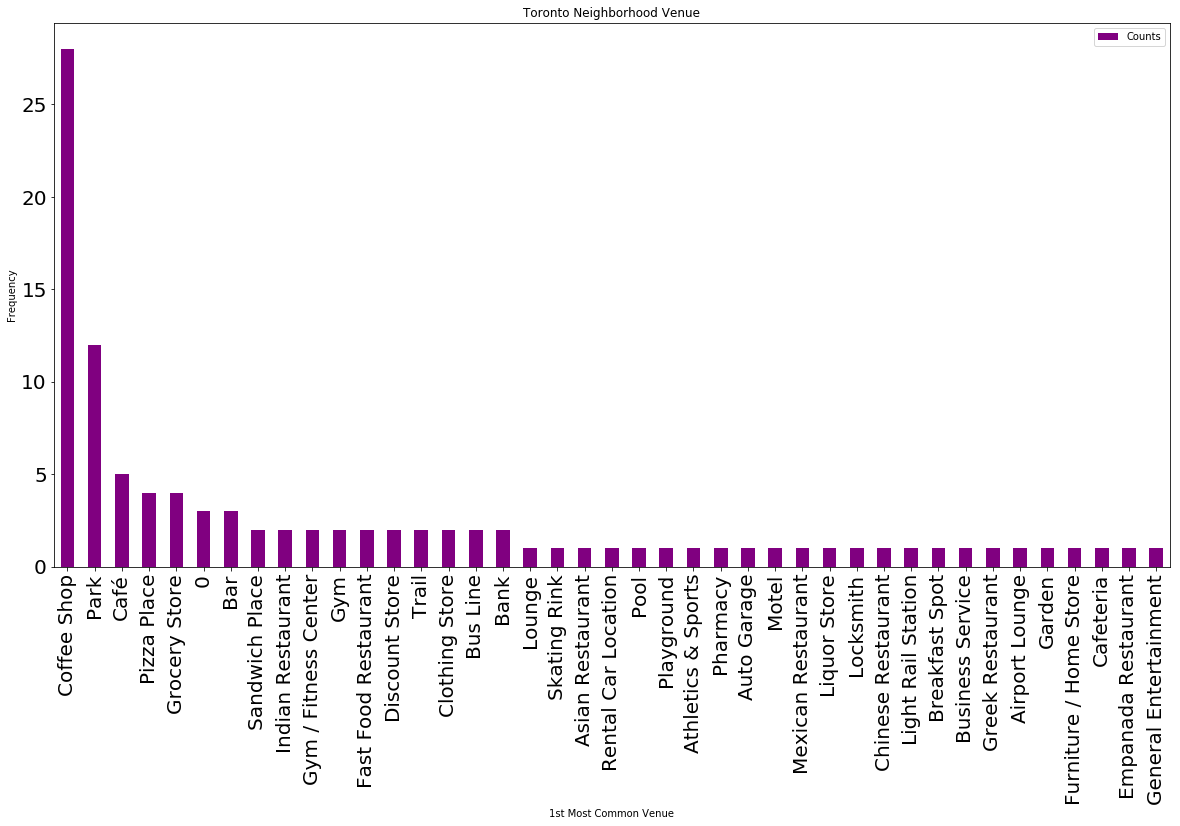

In [85]:
#Plotting the most common venues of Toronto on a bar chart
toronto_sorted.plot(kind='bar',figsize = (20,10), fontsize = 20, color='purple')
plt.ylabel('Frequency')
plt.title('Toronto Neighborhood Venue')
plt.show()

In [86]:
#Getting the neighborhoods for the top 4 most common venues
list_top_venues = ['Coffee Shop','Pizza Place','Café', 'Park']
print('-------------------------------------------------------')
for venue in list_top_venues:
    print('The nearest neighborhood to the ' + venue + ' is : ')
    locator = toronto_new_df.loc[toronto_new_df['1st Most Common Venue'] == venue]
    print(locator['Neighborhood'].values)
    print('---------------------------------------------------')

-------------------------------------------------------
The nearest neighborhood to the Coffee Shop is : 
['Woburn' 'Willowdale South'
 'Bathurst Manor, Downsview North, Wilson Heights'
 'Northwood Park, York University' 'Victoria Village' 'The Beaches'
 'Leaside' 'North Toronto West'
 'Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West'
 'Cabbagetown, St. James Town' 'Church and Wellesley'
 'Harbourfront, Regent Park' 'Ryerson, Garden District' 'St. James Town'
 'Berczy Park' 'Central Bay Street' 'Adelaide, King, Richmond'
 'Harbourfront East, Toronto Islands, Union Station'
 'Design Exchange, Toronto Dominion Centre'
 'Commerce Court, Victoria Hotel' 'Bedford Park, Lawrence Manor East'
 'The Annex, North Midtown, Yorkville' 'Stn A PO Boxes 25 The Esplanade'
 'First Canadian Place, Underground city'
 'Brockton, Exhibition Place, Parkdale Village' 'Runnymede, Swansea'
 "Queen's Park" 'Canada Post Gateway Processing Centre']
-----------------------------------------------

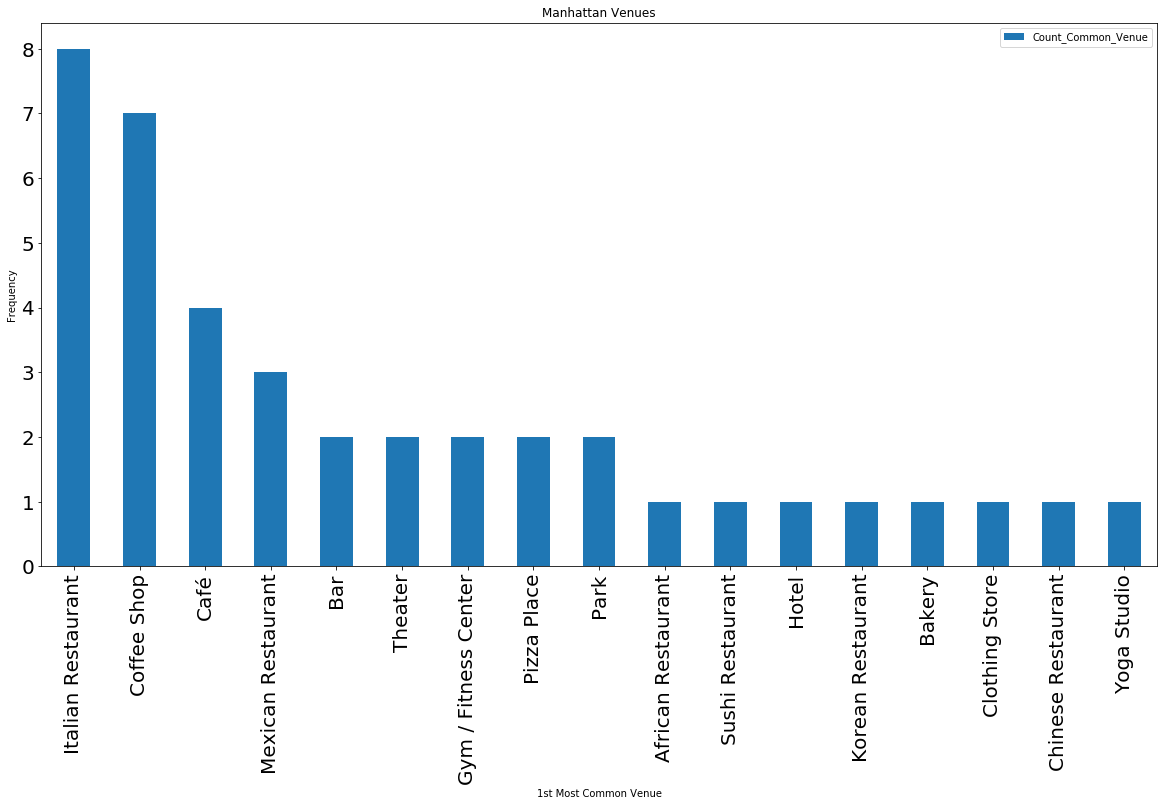

In [87]:
#Plotting the most common venues of Manhattan on a bar chart
manhattan_sorted.plot(kind='bar', figsize = (20,10), fontsize = 20)
plt.ylabel('Frequency')
plt.title('Manhattan Venues')
plt.show()

In [88]:
#Getting the neighborhoods of Manhattan for the top 4 most common venues
list_top_venues = ['Italian Restaurant','Coffee Shop','Mexican Restaurant', 'Gym / Fitness Center']
print('-------------------------------------------------------')
for venue in list_top_venues:
    print('The nearest neighborhood to the ' + venue + ' is : ')
    locator = manhattan_new.loc[manhattan_new['1st Most Common Venue'] == venue]
    print(locator['Neighborhood'].values)
    print('---------------------------------------------------')

-------------------------------------------------------
The nearest neighborhood to the Italian Restaurant is : 
['Upper East Side' 'Yorkville' 'Lenox Hill' 'Upper West Side'
 'Greenwich Village' 'West Village' 'Gramercy' 'Noho']
---------------------------------------------------
The nearest neighborhood to the Coffee Shop is : 
['Marble Hill' 'Manhattanville' 'Murray Hill' 'Chelsea'
 'Morningside Heights' 'Financial District' 'Hudson Yards']
---------------------------------------------------
The nearest neighborhood to the Mexican Restaurant is : 
['Hamilton Heights' 'East Harlem' 'Tudor City']
---------------------------------------------------
The nearest neighborhood to the Gym / Fitness Center is : 
['Civic Center' 'Sutton Place']
---------------------------------------------------
